<a href="https://colab.research.google.com/github/JAMES-YI/00_Python_Tutorial/blob/master/F2019_HW4_Solu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This file will demonstrate solutions to HW4 for ECE 5995: Foundations of Deep Learning
Created by JYI, 10/26/2019

In [0]:
# -*- coding: utf-8 -*-
"""
Codes from
[1] https://www.tensorflow.org/tutorials/keras/classification
[2] https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

Modified by JYI, 10/16/2019
"""

## Set up computation configurations

from __future__ import absolute_import, division, print_function, unicode_literals


# Helper libraries
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.optimizers import SGD, RMSprop, Adagrad, Adam
import keras

Using TensorFlow backend.


Total number of training images: 60000

Shape of each training sample: (28,)

Maximal pixel value: 255

Minimal pixel value: 0



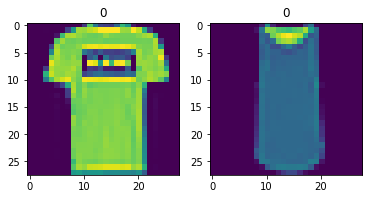

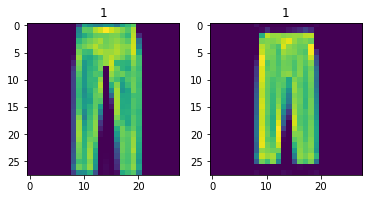

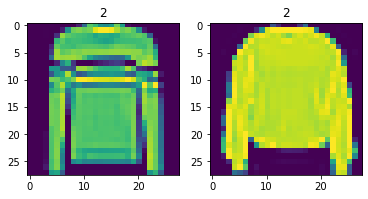

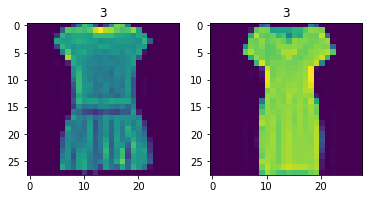

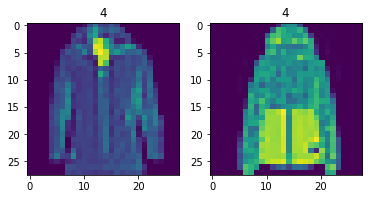

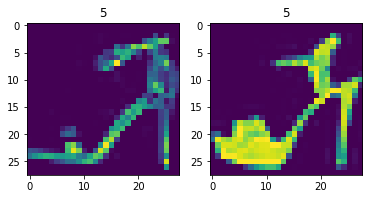

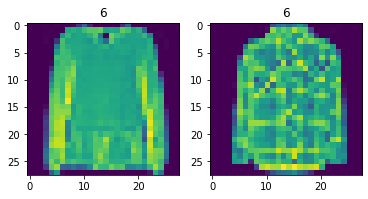

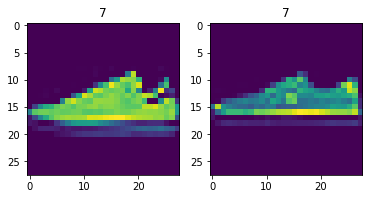

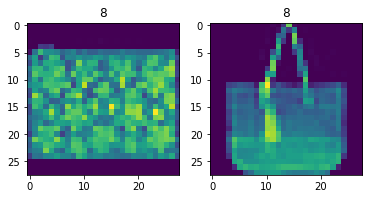

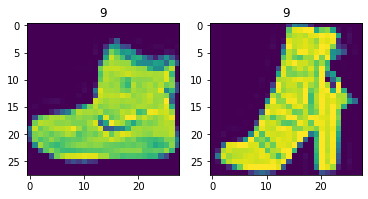

In [0]:
# Load data and data exploration
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(f'Total number of training images: {train_images.shape[0]}\n')
print(f'Shape of each training sample: {train_images.shape[1:2]}\n')
print(f"Maximal pixel value: {np.max(train_images)}\n")
print(f"Minimal pixel value: {np.min(train_images)}\n")

for c in np.arange(10):
  tempimg = train_images[train_labels==c]
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(tempimg[0])
  plt.title(str(c))
  plt.subplot(1,2,2)
  plt.imshow(tempimg[1])
  plt.title(str(c))
  plt.show()
  
train_images = train_images / 255.0
test_images = test_images / 255.0

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.7365 - acc: 0.7643 - val_loss: 0.5740 - val_acc: 0.8080
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.5119 - acc: 0.8267 - val_loss: 0.5069 - val_acc: 0.8253
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.4687 - acc: 0.8393 - val_loss: 0.4795 - val_acc: 0.8331
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.4455 - acc: 0.8458 - val_loss: 0.4662 - val_acc: 0.8339
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.4291 - acc: 0.8512 - val_loss: 0.4607 - val_acc: 0.8354
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.4161 - acc: 0.8555 - val_loss: 0.4402 - val_acc: 0.8436
Epoch 7/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.4046 - acc: 0.8598 - val_loss: 0.4282 - val_acc

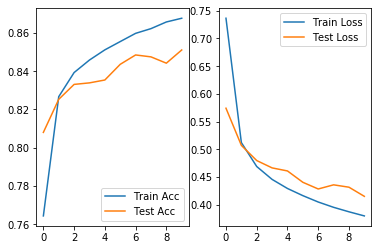

In [0]:
# 2) evaluate learning performance


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images,test_labels),
                    batch_size=32, epochs=10, verbose=1)

# Plot the training loss and accuracy
TrainAcc = history.history['acc']
TrainLoss = history.history['loss']
TestAcc = history.history['val_acc']
TestLoss = history.history['val_loss']

plt.figure()
plt.subplot(1,2,1)
plt.plot(TrainAcc)
plt.plot(TestAcc)
plt.legend(['Train Acc','Test Acc'])
plt.subplot(1,2,2)
plt.plot(TrainLoss)
plt.plot(TestLoss)
plt.legend(['Train Loss','Test Loss'])
plt.show()



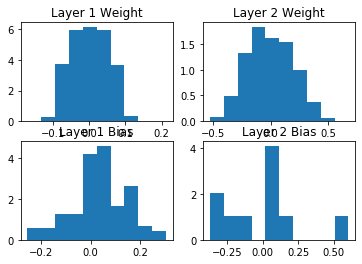

In [0]:
# 3) what does the deep learning system learn

L1Weight = model.layers[1].get_weights()[0]
L1Bias = model.layers[1].get_weights()[1]
L2Weight = model.layers[2].get_weights()[0]
L2Bias = model.layers[2].get_weights()[1]

plt.figure()
plt.subplot(2,2,1)
plt.hist(L1Weight.reshape([-1,]),density=True)
plt.title('Layer 1 Weight')
plt.subplot(2,2,2)
plt.hist(L2Weight.reshape([-1,]),density=True)
plt.title('Layer 2 Weight')
plt.subplot(2,2,3)
plt.hist(L1Bias,density=True)
plt.title('Layer 1 Bias')
plt.subplot(2,2,4)
plt.hist(L2Bias,density=True)
plt.title('Layer 2 Bias')
plt.show()

In [0]:
# How the number of epochs affect the performance

# 2) evaluate learning performance

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

TrLoss = []
TeLoss = []
TrAcc = []
TeAcc = []
EPOC = [10,15,20,25,30]

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images,test_labels),
                    batch_size=32, epochs=np.max(EPOC), verbose=0)

In [0]:
IEPOC = np.array(EPOC)-1
TrLoss = [Val for Ind,Val in enumerate(history.history['loss']) if Ind in IEPOC]
TeLoss = [Val for Ind,Val in enumerate(history.history['val_loss']) if Ind in IEPOC]
TrAcc = [Val for Ind,Val in enumerate(history.history['acc']) if Ind in IEPOC]
TeAcc = [Val for Ind,Val in enumerate(history.history['val_acc']) if Ind in IEPOC]
  

print(f"When the number of epochs are: {EPOC}\n")
print(f"the corresponding training loss are: {TrLoss}\n")
print(f"the corresponding training loss are: {TeLoss}\n")
print(f"the corresponding training accuracy are: {TrAcc}\n")
print(f"the corresponding training accuracy are: {TeAcc}\n")

When the number of epochs are: [10, 15, 20, 25, 30]

the corresponding training loss are: [0.37504868667523067, 0.3446530987242858, 0.32345272597670555, 0.30558585764368373, 0.2904117071052392]

the corresponding training loss are: [0.42063067412376404, 0.39938338389396666, 0.3702130503416061, 0.36546831917762757, 0.35945993233919143]

the corresponding training accuracy are: [0.8689833333333333, 0.8789666666666667, 0.8856, 0.89185, 0.8967]

the corresponding training accuracy are: [0.8507, 0.8598, 0.8679, 0.867, 0.8722]



In [0]:
# 5) how learning rate affects the performance

learning_rate = [0.1,0.01,0.001,0.0001,0.00001]
TrLoss = []
TeLoss = []
TrAcc = []
TeACC = []

for val in learning_rate:
  print(f"Training with learning rate {val}...\n")
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
  ])

  sgd = SGD(lr=val)
  model.compile(optimizer=sgd,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, 
                      validation_data=(test_images,test_labels),
                      batch_size=32, epochs=10, verbose=1)
  
  TrLoss.append(history.history['loss'][-1])
  TeLoss.append(history.history['val_loss'][-1])
  TrAcc.append(history.history['acc'][-1])
  TeAcc.append(history.history['val_acc'][-1])
  
print(f"When trained learning rate: {learning_rate}\n")
print(f"the corresponding train losses are: {TrLoss}\n")
print(f"the corresponding test losses are: {TeLoss}\n")
print(f"the corresponding train accuracies are: {TrAcc}\n")
print(f"the corresponding test accuracies are: {TeAcc}\n")
  


Training with learning rate 0.1...

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.5444 - acc: 0.8054 - val_loss: 0.4442 - val_acc: 0.8397
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.4057 - acc: 0.8533 - val_loss: 0.4503 - val_acc: 0.8379
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3660 - acc: 0.8669 - val_loss: 0.3900 - val_acc: 0.8582
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.3441 - acc: 0.8744 - val_loss: 0.3952 - val_acc: 0.8515
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3272 - acc: 0.8805 - val_loss: 0.3775 - val_acc: 0.8663
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3110 - acc: 0.8845 - val_loss: 0.3737 - val_acc: 0.8688
Epoch 7/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2995 - acc:

In [0]:
# 6) how the number of neurons can affec the performance

print(f"16 neurons\n\n")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

sgd = SGD(lr=0.1)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images,test_labels),
                    batch_size=32, epochs=10, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 9.8502 - acc: 0.3544 - val_loss: 9.8437 - val_acc: 0.3827
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 8.5715 - acc: 0.4557 - val_loss: 6.9993 - val_acc: 0.5439
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 2.0942 - acc: 0.7258 - val_loss: 0.5672 - val_acc: 0.7914
Epoch 4/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.4812 - acc: 0.8291 - val_loss: 0.4667 - val_acc: 0.8304
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.4374 - acc: 0.8430 - val_loss: 0.4420 - val_acc: 0.8409
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.4128 - acc: 0.8511 - val_loss: 0.4287 - val_acc: 0.8459
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3987 - acc: 0.8561 - val_loss: 0.4219 - val_acc

In [0]:
print(f"32 neurons\n\n")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

sgd = SGD(lr=0.1)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images,test_labels),
                    batch_size=32, epochs=10, verbose=1)

32 neurons


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.5725 - acc: 0.7956 - val_loss: 0.4658 - val_acc: 0.8365
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.4330 - acc: 0.8452 - val_loss: 0.4395 - val_acc: 0.8432
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.3966 - acc: 0.8555 - val_loss: 0.4420 - val_acc: 0.8306
Epoch 4/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.3736 - acc: 0.8640 - val_loss: 0.4018 - val_acc: 0.8545
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.3598 - acc: 0.8677 - val_loss: 0.3896 - val_acc: 0.8591
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3465 - acc: 0.8744 - val_loss: 0.3962 - val_acc: 0.8571
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3381 - acc: 0.8761 - val_loss: 0.3

In [0]:
print(f"64 neurons\n\n")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

sgd = SGD(lr=0.1)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images,test_labels),
                    batch_size=32, epochs=10, verbose=1)

64 neurons


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.5513 - acc: 0.8032 - val_loss: 0.4806 - val_acc: 0.8253
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.4113 - acc: 0.8513 - val_loss: 0.4433 - val_acc: 0.8425
Epoch 3/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.3753 - acc: 0.8653 - val_loss: 0.4021 - val_acc: 0.8581
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3510 - acc: 0.8720 - val_loss: 0.3862 - val_acc: 0.8630
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3350 - acc: 0.8770 - val_loss: 0.3834 - val_acc: 0.8607
Epoch 6/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.3215 - acc: 0.8835 - val_loss: 0.3676 - val_acc: 0.8689
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3092 - acc: 0.8870 - val_loss: 0.3

In [0]:
print(f"256 neurons\n\n")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images,test_labels),
                    batch_size=32, epochs=10, verbose=1)

256 neurons


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.7238 - acc: 0.7636 - val_loss: 0.5647 - val_acc: 0.8060
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.5097 - acc: 0.8266 - val_loss: 0.5048 - val_acc: 0.8266
Epoch 3/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.4663 - acc: 0.8403 - val_loss: 0.4887 - val_acc: 0.8272
Epoch 4/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.4413 - acc: 0.8478 - val_loss: 0.4569 - val_acc: 0.8390
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.4241 - acc: 0.8540 - val_loss: 0.4512 - val_acc: 0.8400
Epoch 6/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.4107 - acc: 0.8586 - val_loss: 0.4372 - val_acc: 0.8432
Epoch 7/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3995 - acc: 0.8616 - val_l

In [0]:
print(f"Add one extra layer\n")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images,test_labels),
                    batch_size=32, epochs=10, verbose=1)

Add one extra layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.7596 - acc: 0.7479 - val_loss: 0.5457 - val_acc: 0.8122
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.4993 - acc: 0.8251 - val_loss: 0.4852 - val_acc: 0.8287
Epoch 3/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.4548 - acc: 0.8398 - val_loss: 0.4841 - val_acc: 0.8291
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.4295 - acc: 0.8484 - val_loss: 0.4647 - val_acc: 0.8362
Epoch 5/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.4082 - acc: 0.8575 - val_loss: 0.4270 - val_acc: 0.8475
Epoch 6/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3920 - acc: 0.8613 - val_loss: 0.4121 - val_acc: 0.8513
Epoch 7/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.3785 - acc: 0.8659 

In [0]:
print(f"Add two extra layer\n")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images,test_labels),
                    batch_size=32, epochs=10, verbose=1)

Add two extra layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.7933 - acc: 0.7263 - val_loss: 0.5634 - val_acc: 0.7923
Epoch 2/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.5086 - acc: 0.8199 - val_loss: 0.4977 - val_acc: 0.8266
Epoch 3/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.4594 - acc: 0.8369 - val_loss: 0.4801 - val_acc: 0.8310
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.4289 - acc: 0.8473 - val_loss: 0.4479 - val_acc: 0.8366
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.4061 - acc: 0.8545 - val_loss: 0.4302 - val_acc: 0.8452
Epoch 6/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.3898 - acc: 0.8598 - val_loss: 0.4240 - val_acc: 0.8436
Epoch 7/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.3766 - acc: 0.8641 

In [0]:
print(f"Add three extra layer\n")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images,test_labels),
                    batch_size=32, epochs=10, verbose=1)

Add three extra layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.7808 - acc: 0.7245 - val_loss: 0.6188 - val_acc: 0.7543
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.4985 - acc: 0.8221 - val_loss: 0.4937 - val_acc: 0.8234
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.4430 - acc: 0.8425 - val_loss: 0.4424 - val_acc: 0.8443
Epoch 4/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.4117 - acc: 0.8531 - val_loss: 0.4236 - val_acc: 0.8509
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3905 - acc: 0.8589 - val_loss: 0.4227 - val_acc: 0.8460
Epoch 6/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3721 - acc: 0.8653 - val_loss: 0.4072 - val_acc: 0.8523
Epoch 7/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3599 - acc: 0.871